In [37]:



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [38]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-differenttechniques/heart.csv


In [39]:
df=pd.read_csv("/kaggle/input/heart-disease-prediction-using-differenttechniques/heart.csv")

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [42]:
df.shape

(303, 14)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Now check Correlation

In [45]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Normalization

In [46]:
for i in df.columns:
    for each in df[i].values:
        
        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i]))/(np.max(df[i]) - np.min(df[i]))
        else:
            pass

In [47]:
y = df["target"]
X = df.drop(["target"],axis = 1)

# Now Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [50]:
y_train

100    1
39     1
230    0
185    0
277    0
      ..
58     1
87     1
197    0
174    0
122    1
Name: target, Length: 242, dtype: int64

In [51]:
print(X_train.shape)
print(y_train.shape)

(242, 13)
(242,)


# Machine Learning (Classification)
Logistic Regression

KNN(K Neighbors)

Decision Tree

Random Forests

SVM

GBM (Gradient Boosting Machine)

AdaBoost

Bagging

# Now Import Some important libs

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [53]:
log_reg=LogisticRegression(random_state=0,max_iter=900)

In [54]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=900, random_state=0)

In [55]:
y_pred=log_reg.predict(X_test)

In [56]:
log_reg.score(X_test,y_test)

0.8852459016393442

# GridSearchCV

In [57]:
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [58]:
log_reg2 = LogisticRegression(C = 1,random_state = 0,penalty='l2')
log_reg2.fit(X_train,y_train)

LogisticRegression(C=1, random_state=0)

In [59]:
log_reg2.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [60]:
log_reg2.score(X_test,y_test)

0.8852459016393442

# KNN (K Neighbors)

In [61]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn.score(X_test,y_test)

0.8032786885245902

In [62]:
params = {"n_neighbors": range(1,50)}
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, params, cv = 10, n_jobs = -1).fit(X_train,y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [63]:
knn_tuned = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
knn_tuned.score(X_test,y_test)

0.8524590163934426

# Decision Tree

In [64]:
tree = DecisionTreeClassifier(random_state = 0).fit(X_train,y_train)
tree.score(X_test,y_test)

0.8032786885245902

In [65]:
params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}
tree_model = DecisionTreeClassifier(random_state = 0)
tree_cv = GridSearchCV(tree_model, params, cv = 10, n_jobs = -1).fit(X_train,y_train)
tree_cv.best_params_

{'max_depth': 7, 'min_samples_split': 37}

In [66]:
tree_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 7, min_samples_split = 2,random_state = 42).fit(X_train,y_train)
tree_tuned.score(X_test,y_test)

0.819672131147541

# SVM

In [67]:
svm = SVC(random_state = 42).fit(X_train,y_train)
svm.score(X_test,y_test)

0.8688524590163934

In [68]:
params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svm_model = SVC(random_state = 42)
svm_cv = GridSearchCV(svm_model,params,cv = 10,n_jobs = -1).fit(X_train,y_train)
svm_cv.best_params_

{'C': 5, 'gamma': 1}

In [69]:
svm_tuned = SVC(C = 100, degree = 1, gamma = 0.001, random_state = 42).fit(X_train,y_train)
svm_tuned.score(X_test,y_test)

0.8852459016393442

# Compare Algorithms

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns

Score :  0.8852459016393442


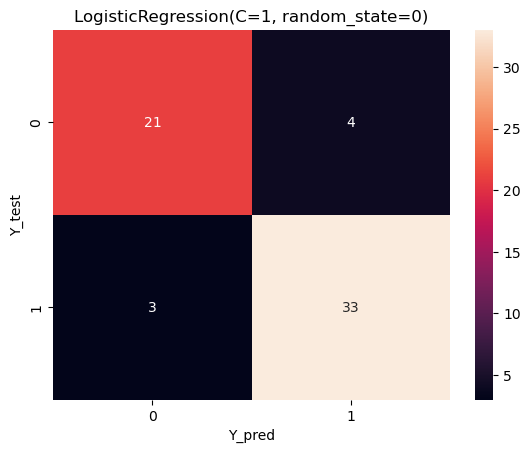

Score :  0.8524590163934426


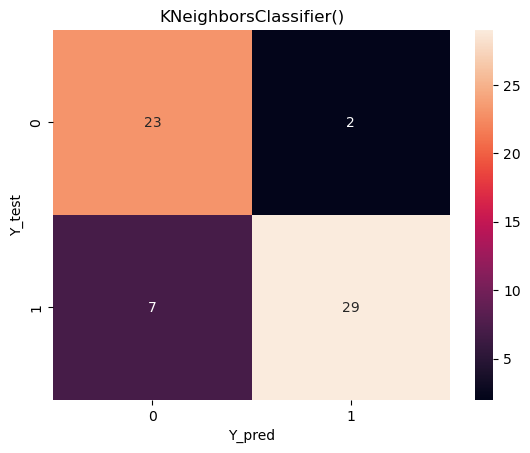

Score :  0.819672131147541


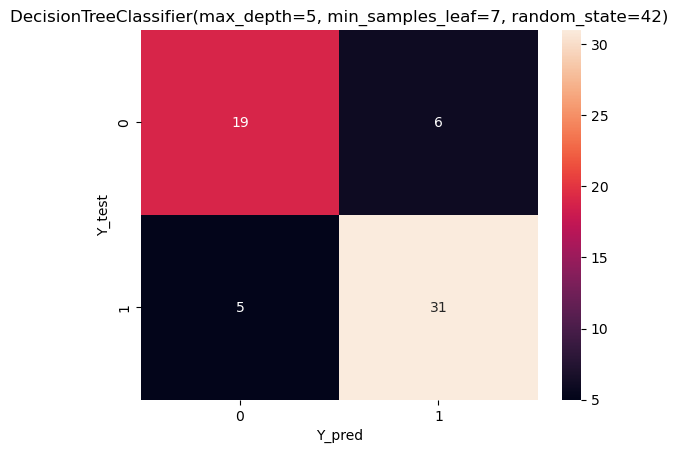

Score :  0.8852459016393442


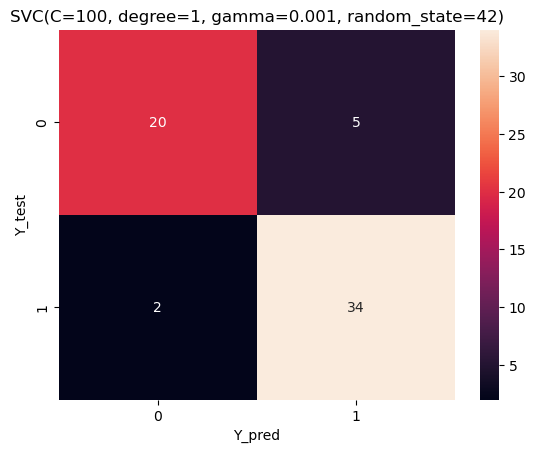

In [71]:
pred_list = [log_reg2,knn_tuned,tree_tuned,svm_tuned]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [72]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)
LRAcc=LRclassifier.score(X_test,y_test)
LRAcc

0.9180327868852459

In [73]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)
KNNAcc=KNNClassifier.score(X_test,y_test)
KNNAcc

0.8524590163934426

In [74]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=100, C=1, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
SVMAcc=SVMclassifier.score(X_test,y_test)
SVMAcc

0.9016393442622951

In [75]:
# --- Applying Gaussian NB ---
from sklearn.naive_bayes import GaussianNB


GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
GNBAcc=GNBclassifier.score(X_test,y_test)
GNBAcc

0.8688524590163934

In [76]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, criterion='entropy', min_samples_split=15,
                                       splitter='random', random_state=3)

DTCclassifier.fit(X_train, y_train)
y_pred_DTC = DTCclassifier.predict(X_test)
DTCAcc=DTCclassifier.score(X_test,y_test)
DTCAcc

0.8524590163934426

0.9344262295081968

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=99, random_state=47)

ETclassifier.fit(X_train, y_train)
y_pred_ET = ETclassifier.predict(X_test)
ETAcc=ETclassifier.score(X_test,y_test)
ETAcc

0.8852459016393442

In [79]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=7, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=14)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)
GBAcc=GBclassifier.score(X_test,y_test)
GBAcc


0.9180327868852459

In [80]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
ABAcc=ABclassifier.score(X_test,y_test)
ABAcc

0.9016393442622951

In [81]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,93.442623
Logistic Regression,91.803279
Gradient Boosting,91.803279
Support Vector Machine,90.163934
AdaBoost,90.163934
Extra Tree Classifier,88.524590
Gaussian Naive Bayes,86.885246
K-Nearest Neighbour,85.245902
Decision Tree,85.245902


In [82]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0.0,0.603053,0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0,0.5,0.885496,0,0.564516,0.0,0.0,0.666667,1


In [83]:
# --- Turn Information into List ---
data = [[0.708333, 1, 1, 0.481132,   ## age_scaled, sex, trestbps_scaled, chol
         0.244292, 1, 0, 0.603053,         ## fbs, restecg_scaled, thalach_scaled, exang
         0.0, 0.370968, 0, 0.0,0.333333]]           ## thal_2, thal_3, slope_0, slope_1, slope_2

# --- Prediction using Gradient Boosting ---
result = RFclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('.:. Heart Disease Detected!.:.')
else:
  print('.:. Heart Disease Not Detected!.:.')

.:. Heart Disease Detected!.:.


# --- Export Pickle File ---
file = open('heart_disease_GB_caesarmario.pkl', 'wb')
pickle.dump(GBclassifier, file)